<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Classification_MLP_Caso_Practico_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Keras: Implementando una RNA para clasificación

## Pasos en la implementación de una Red Neuronal Artificial en Keras



1.   Define tu conunto de datos de entrenamiento: vectores de entrada y de salida
2.   Define la arquitectura de la Red Neuronal Artificial
3. Configura el proceso de apredizaje mediante la selección de una función de error, una función de optimización y diferentes metricas para monitorizar el proceso.
4. Entrena la RNA con tu conjunto de datos de entrenamiento mediante el uso de método **fit()**



## 0. Imports
Lo primero que debe hacerse es importar las librerías específicas necesarias para la implementación de la Red Neuronal Artificial. En las nuevas verisones de TensorFlow y Keras, la recomendación es utilizar a través del framework TensorFlow.

In [53]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [54]:
from tensorflow import keras

## 1. Definición del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos
Keras nos proporciona algunos conjuntos de datos de prueba que podemos utilizar para la realización de pruebas.

In [55]:
from tensorflow.keras import datasets

Podemos utilizar tab sobre "datasets" para visualizar los conjuntos de datos disponibles. En este caso vaos a imoportar el conjunto de datos MNIST.

In [56]:
mnist = datasets.mnist

Podemos utilizar hsift + tab sobre "load_data()" para visualizar el input y putput del método.

In [57]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

El conjunto de datos importado esta formado por un total de 70000 imágenes divididas en dos conjuntos de datos, el conjunto de datos de entrenamiento A_train (60000 imágenes) y el conjunto de datos de pruebas (10000 imágenes).

In [58]:
X_train.shape

(60000, 28, 28)

In [59]:
X_test.shape

(10000, 28, 28)

Las etiquetas se corresponden con el valor numélrico que representa la imágen.

In [60]:
y_train.shape

(60000,)

In [61]:
y_train[0]

5

### 1.2. Visualizando el conjunto de datos

In [62]:
import numpy as np
import matplotlib.pyplot as plt

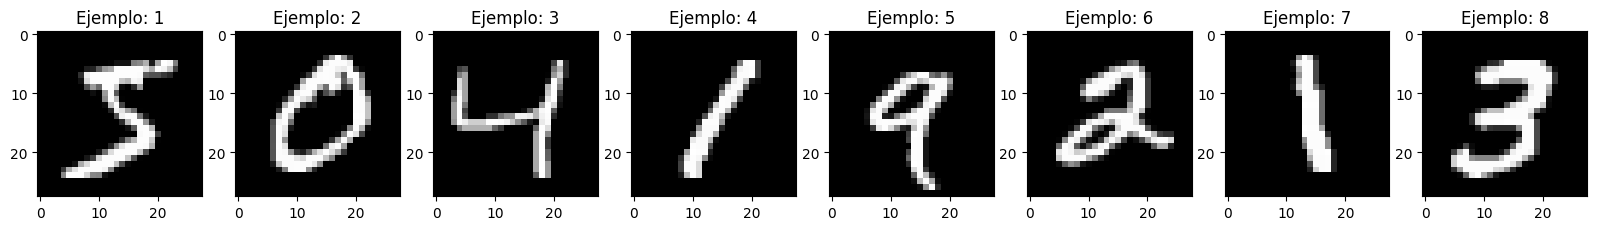

In [63]:
# Visualización de los primeros 8 ejemplos de nuestro conunto de datos de entrenamiento
plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), X_train[:8]):
  plt.subplot(1, 8, index)
  plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
  plt.title('Ejemplo: '+str(index))
plt.show()

### 1.3. División del conjunto de datos

Para la realización de una serie de pruebas adicionales vamos a dividir el conjunto de datos de prueba en dos subconjuntos, el conjunto de validación (X_val) y el conjunto de pruebas (X_test)

In [64]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [65]:
X_test.shape

(5000, 28, 28)

In [66]:
X_val.shape

(5000, 28, 28)

## 2. Definición de la arquitectura de la Red Neuronal Artificial

Tal y como puede observar en la definición de la Red Neuronal Artifivial que se muestra a continuación, el bloque básico que utiliza Keras es un **layer** o capa. La red Neuronal estará formada por diferentes capas que a su vez contendrán un conjunto de neuronas que se corresponden con el primer parámetro que se proporciona.

In [67]:
from tensorflow.keras import models
from tensorflow.keras import layers

Definimos una Red Neuronal Artificial formada por 3 capas:

*   La primera capa estará formada por 300 neuronas
*   La segunda capa estará formada por 100 neuronas
*   La última capa estará formada por 10 neuronas





In [68]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

Una vez hacemos la arquitectura de la Red Neuronal Artificial podemos visualizarla junto con el número total de parámetros utilizando el método summary().

Se tiene imágenes de 28*28=784 características de entrada a cada una de las neuronas de la primera hidden layer, sumado a una byas term por cada neurona. Por tanto, sería 28*28*300+300=235500

La segunda hidden layer compuesta por 100 neuronas tiene la entrada de 300 output de la primera hidden layer. Se suma un byas term como entrada a cada una de las neuronas. Por tanto, seria, 300*100+100=30100

La output layer conformado por 10 neuronas, tiene como entrada 100 neuronas de las segunda hidden layer. Sumado a un byas term. Por tanto sería, 10*100+10=1010

In [69]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Acceso a los elementos definifos de la RNA

In [70]:
network.layers

En este caso vamos a acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer.

In [71]:
hidden1 = network.layers[1]

In [72]:
weights, biases = hidden1.get_weights()

Como puede observase en las siguientes celdas, Keras automáticamente incializa el valor de los parámetros de manera aleatoria y los bías term con el valor 0

In [73]:
weights

array([[ 0.08522499, -0.00972115,  0.08632972, ..., -0.03447889,
         0.12168225,  0.11105081],
       [ 0.04327708, -0.04798365, -0.03384536, ...,  0.11717211,
        -0.10081775, -0.02830141],
       [-0.11928095, -0.07060075,  0.06226129, ..., -0.05113482,
        -0.01945577, -0.11122739],
       ...,
       [ 0.08282953,  0.03141964, -0.10020081, ..., -0.06187562,
         0.0500579 , -0.01517394],
       [ 0.05626553, -0.09617834, -0.01759218, ..., -0.02137773,
         0.09085286, -0.02508092],
       [ 0.01687277, -0.00710207,  0.06034704, ...,  0.06667002,
         0.0228227 ,  0.01809446]], dtype=float32)

In [74]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## 3. Configuración de la Red Neuronal Artificial
Para que la Red Neuronal Artificial funvione adecuadamente va a requerir tres componentes adicionales que se seleccionan durante el proceso de compilación:



1.   **La función de error:** Se utiliza en el proceso de optimización de los parámetros del modelo para medir el error producido al modificar el valor de los parámetros del modelo en una dirección determinada.
2.   **La función de optimización:** Se corresponde con la función encargada de actualizar el valor de los parámetros del modelo en una dirección determinada en función del resultado de la dunción de error.
3. **Metricas para monitorizar el proceso de entrenamiento:** Es interesante utilizar un conjunto de métricas durante el proceso de entrenamiento de la Red Neuronal Artificial de manera que podamos saber en cada iteración si el valor de los parámetros del modelo es adecuado o se están produciendo problemas como *overfitting*.



In [75]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

## 4. Prepararación del conjunto de datos
Debido a la forma en la que hemos definido la arquitectura de nuestra Red Neuronal Artificial y los parámetrso de compilación, vamos a requerir realizar algunas transformaciones sobre nuestro conjunto de datos.

### 4.1. Prepararación de las características de entrada

In [76]:
X_train_prep = X_train.reshape((60000, 28*28))
X_train_prep = X_train_prep.astype('float32')/255

X_test_prep = X_test.reshape((5000, 28*28))
X_test_prep = X_test_prep.astype('float32')/255

X_val_prep = X_val.reshape((5000, 28*28))
X_val_prep = X_val_prep.astype('float32')/255

In [77]:
X_train[0].shape

(28, 28)

In [78]:
X_train_prep[0].shape

(784,)

### 4.2. Preparación de las características de salida (etiquetas)

In [79]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)
y_val_prep = to_categorical(y_val)

In [80]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [81]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [82]:
y_train_prep

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## 5. Entrenamiento de la Red Neuronal Artificial
En este punto ya estamos listos para entrenar nuestra Red Neuronal Artificial incocando el método fit(). Una de las capacidades que nos proporciona Kera es la de integrar el proceso de validación en el propio proceso de entrenaiento, para ello, junto con el subconjunto de daros de entrenamiento, debemos proporcionarle a este método el subconjunto de validación.

In [85]:
history = network.fit(X_train_prep, y_train_prep, epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5876 - accuracy: 0.8447 - precision: 0.9399 - val_loss: 0.3102 - val_accuracy: 0.9104 - val_precision: 0.9400
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2783 - accuracy: 0.9208 - precision: 0.9441 - val_loss: 0.2493 - val_accuracy: 0.9286 - val_precision: 0.9473
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2247 - accuracy: 0.9355 - precision: 0.9542 - val_loss: 0.2167 - val_accuracy: 0.9372 - val_precision: 0.9492
Epoch 4/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1911 - accuracy: 0.9454 - precision: 0.9595 - val_loss: 0.1855 - val_accuracy: 0.9488 - val_precision: 0.9573
Epoch 5/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1663 - accuracy: 0.9524 - precision: 0.9649 - val_loss: 0.1675 - val_accuracy: 0.9510 - val_precision: 0.9614
Epoch 6/30
1875/1875 [==============================] - 

En la variable **history** se almacenan varios valores importantes:


*   El valor de los parámetros del modelo después del entrenamiento.
*   La lista de epochs llavados a cabo.
*   Un diccionario con el error producido en cada epoch en el conjunto de datos de entrenamiento y validación



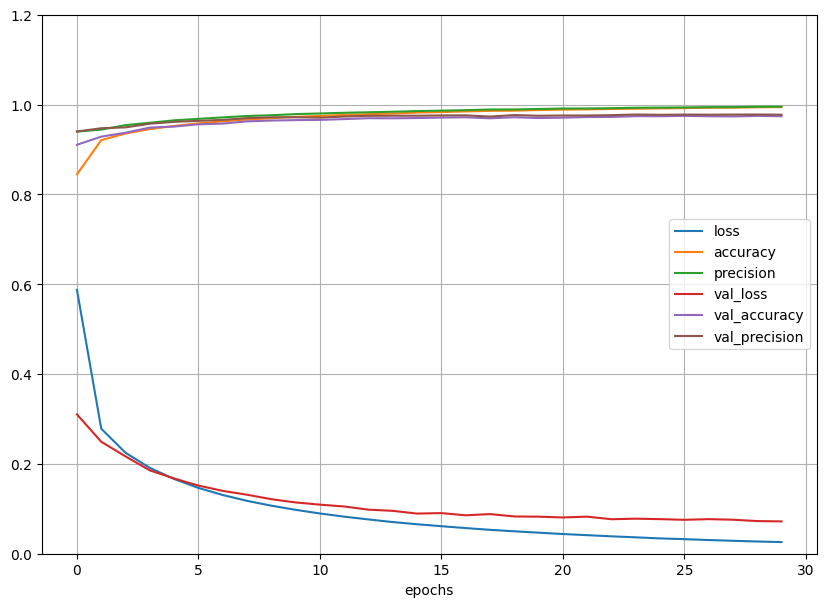

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

Debido a que en la gráfica anterior se observa que el error en el conjunto de datos y de validación segue disminuyendo, podemos continuar entrenando el algoritmo invocando de nuevo el método fit(). Keras continuará el entrenamiento en el puntoen el lo dejó.

## 6. Validación con el conjunto de datos de pruebas

In [87]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

157/157 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.9818 - precision: 0.9851


In [88]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.9818000197410583
test_prec: 0.9851136803627014


## 7. Predicción de nuevos ejemplos

In [89]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[34]

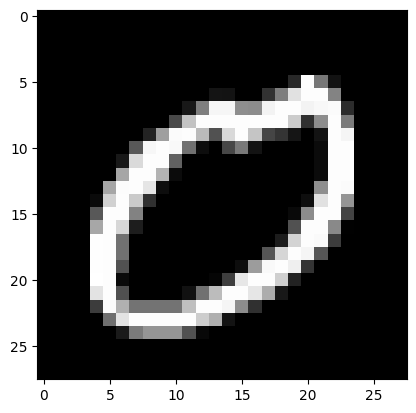

In [90]:
# Representación gráfica del nuevo ejemplo que queremos predecir
plt.imshow(np.reshape(X_new, (28,28)), cmap=plt.cm.gray)
plt.show()

In [92]:
# Preprocesamos la nueva imagen que queremos predecir
X_new_prep = X_new.reshape(1,28*28)
X_new_prep = X_new_prep.astype('float32')/255

In [93]:
# Realizamos la predicción
y_proba = network.predict(X_new_prep)

1/1 [==============================] - 0s 168ms/step


In [94]:
y_proba.round(2)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [95]:
# Realizamos la predicción obteniendo una clase en lugar de una probabilidad
np.argmax(network.predict(X_new_prep), axis=-1)

1/1 [==============================] - 0s 36ms/step


array([0])

Es importante saber que el método tradicional *predict_classes* va a ser deprecado próximamente

## 8. Guardar el modelo en disco
Con Keras generamos la arquitectura de la red neuronal, la entrenamos y después la evaluamos. Existen diferentes alternativas a la hora de exportar el modelo entrenado (https://keras.io/getting_started/fag/#what-are-my-options-for-saving-models), en este caso se expone una de las más utilizadas.

De la forma que se indica a continuación, vamos a exportar en un fichero los siguientes coponentes de la red neuronal:


*   La arquitectura del modelo
*   Los parámetros del modelo
*   Los hiperparámetros del modelo
*   Las métricas



In [96]:
# Guardamos el modelo en disco
network.save("modelo_mnist")

Una vez ejecutada la celda anterior, generará un fichero *modelo_mnist* que puede utilizarse para transportarlo a otro sistema y predecir con nuevos ejemplos. La forma en la uqe puedas importar este fichero para predecir con nuevos ejemplos es la siguiente:

In [97]:
# Importamos las librerias necesaria
from tensorflow.keras.models import load_model

# Cargamos el modelo de disco
mnist_model = load_model("modelo_mnist")

# Realizamos una nueva predicción
y_pred = np.argmax(mnist_model.predict(X_new_prep), axis=-1)

1/1 [==============================] - 0s 145ms/step


In [98]:
y_pred

array([0])